# Import libraries

In [1]:
import sys
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

# Import modules

In [2]:
# Add path for module
# FIXME: shouldn't need this with a package install (`__init__` should suffice?!)
MODEL_DIR = Path().resolve().parent / "KuehnEtAl2023"
sys.path.append(str(MODEL_DIR))

import run_average_displacement

# View the docstrings

In [3]:
help(run_average_displacement)

Help on module run_average_displacement:

NAME
    run_average_displacement

DESCRIPTION
    This file runs the KEA23 displacement model to calculate the average displacement that is implied by the model prediction.
    - The model-implied Average Displacement is calculated as the area under the mean slip profile.
    - The mean model (i.e., mean coefficients) is used.
    - The results are returned in a pandas DataFrame.
    - Command-line use is supported; try `python run_average_displacement.py --help`
    - Module use is supported; try `from run_average_displacement import run_ad`
    
    # NOTE: This script just calls `run_displacement_profile.py` which in turn calls `run_displacement_model.py`
    
    Reference: https://doi.org/10.1177/ToBeAssigned

FUNCTIONS
    main()
    
    run_ad(*, magnitude: Union[float, int, List[Union[float, int]], numpy.ndarray], style: str) -> pandas.core.frame.DataFrame
        Run KEA23 displacement model to calculate the average displacement that

# Run Average Displacement

## Single scenarios

A single scenario is defined as a magnitude/style. Here is an example (note all parameters must be passed as keyword arguments).

In [4]:
df = run_average_displacement.run_ad(magnitude=7, style="strike-slip")
df

,magnitude,style,model_number,avg_displ
0,7.0,strike-slip,-1,1.447169


In [5]:
df = run_average_displacement.run_ad(magnitude=7, style="reverse")
df

,magnitude,style,model_number,avg_displ
0,7.0,reverse,-1,1.550645


In [6]:
df = run_average_displacement.run_ad(magnitude=7, style="normal")
df

,magnitude,style,model_number,avg_displ
0,7.0,normal,-1,1.465161


## Multiple scenarios

Because the profiles are based on the mean model coefficients (this is hard-coded in run_average_displacement.py), multiple mangitudes or percentiles can be run. However, only one style is permitted.

In [7]:
df = run_average_displacement.run_ad(magnitude=[5,6,7,8], style="reverse")
df

,magnitude,style,model_number,avg_displ
0,5.0,reverse,-1,0.148525
1,6.0,reverse,-1,0.521413
2,7.0,reverse,-1,1.550645
3,8.0,reverse,-1,3.663152


In [8]:
try:
    results = run_average_displacement.run_ad(magnitude=7, style=["strike-slip", "reverse"])
except TypeError as e:
    print(e)

Expected a string, got '['strike-slip', 'reverse']', which is a list.(In other words, only one value is allowed; check you have not entered a list or array.)


## Create magnitude scaling plots

In [9]:
magnitudes = np.arange(5, 8.6, 0.1)

df_ss = run_average_displacement.run_ad(magnitude=magnitudes, style="strike-slip")
df_rv = run_average_displacement.run_ad(magnitude=magnitudes, style="reverse")
df_nm = run_average_displacement.run_ad(magnitude=magnitudes, style="normal")

df_ss.to_csv("kea23_ss_ad.csv", index=False)
df_rv.to_csv("kea23_rv_ad.csv", index=False)
df_nm.to_csv("kea23_nm_ad.csv", index=False)

df_ss.head()

D:\Documents\_mydocs\Work FDHI\TEAM\Journal\kea23\KuehnEtAl2023\run_displacement_model.py:90: RuntimeWarning: invalid value encountered in power
  D_mean = (np.power(lam * mu + 1, 1 / lam)) * (


,magnitude,style,model_number,avg_displ
0,5.0,strike-slip,-1,0.000470
1,5.1,strike-slip,-1,0.001268
2,5.2,strike-slip,-1,0.002821
3,5.3,strike-slip,-1,0.005499
4,5.4,strike-slip,-1,0.009747


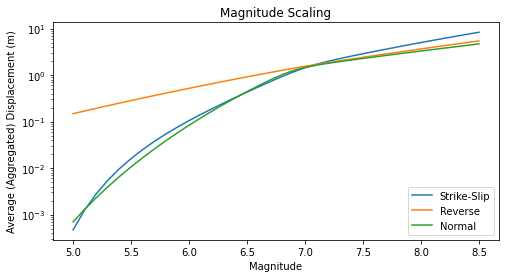

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.semilogy(df_ss["magnitude"], df_ss["avg_displ"], label="Strike-Slip")
ax.semilogy(df_rv["magnitude"], df_rv["avg_displ"], label="Reverse")
ax.semilogy(df_nm["magnitude"], df_nm["avg_displ"], label="Normal")
ax.set(
    xlabel="Magnitude",
    ylabel="Average (Aggregated) Displacement (m)",
    title="Magnitude Scaling",
)
ax.legend(loc="lower right")
plt.savefig("magnitude_scaling_ad.png", bbox_inches="tight")